                     R²
Model                  
KNN (k=5)      0.995913
Decision Tree  0.998428
Random Forest  0.998912


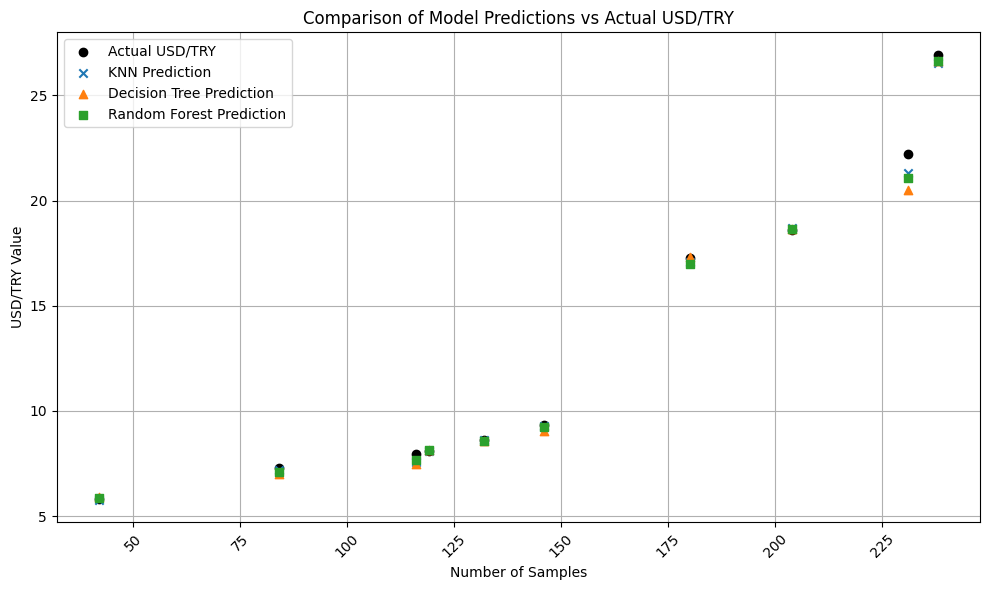

In [15]:
# ─── 1) Data Reading and Libraries ─────────────────────────────────────────────
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
df = pd.read_csv('../data/processed/merged_analysis.csv')
import matplotlib.pyplot as plt

# Convert datetime
for col in ['Week', 'Date']:
    df[col] = pd.to_datetime(df[col], errors='coerce')
    med = df[col].median()
    df[col] = df[col].fillna(med)
    df[f"{col}_ord"] = df[col].map(lambda d: d.toordinal())
    df.drop(col, axis=1, inplace=True)

# Target
X = df[['Week_ord', 'Date_ord']]
y = df['USD_TRY'].copy().dropna()
X = X.loc[y.index]

# ─── 2) Split Train Test ───────────────────────────────────────────────────
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ─── 3) Scaler ────────────────────────────────────────────────────────
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

# ─── 4) Models ──────────────────────────────────────────
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree      import DecisionTreeRegressor
from sklearn.ensemble  import RandomForestRegressor

models = {
    'KNN (k=5)'       : KNeighborsRegressor(n_neighbors=5),
    'Decision Tree'   : DecisionTreeRegressor(random_state=42),
    'Random Forest'   : RandomForestRegressor(n_estimators=100, random_state=42),
}

preds = {}
for name, mdl in models.items():
    mdl.fit(X_train_s, y_train)
    preds[name] = mdl.predict(X_test_s)

# ─── 5) Metrics ───────────────────────────────────────────────
from sklearn.metrics import r2_score

results = []
for name, y_pred in preds.items():
    r2   = r2_score(y_test, y_pred)
    results.append((name, r2))

metrics_df = pd.DataFrame(
    results,
    columns=['Model', 'R²']
).set_index('Model')

print(metrics_df)

# ─── 6) Comparison ────────────────────────────────
sample_idx = np.random.RandomState(42).choice(len(y_test), 10, replace=False)
comp = pd.DataFrame({
    'Real': y_test.values[sample_idx],
    '(KNN)': preds['KNN (k=5)'][sample_idx],
    '(DT)':   preds['Decision Tree'][sample_idx],
    '(RF)':   preds['Random Forest'][sample_idx],
}, index=y_test.index[sample_idx])

# Plotting scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(comp.index, comp['Real'], label='Actual USD/TRY', color='black', marker='o')
plt.scatter(comp.index, comp['(KNN)'], label='KNN Prediction', marker='x')
plt.scatter(comp.index, comp['(DT)'], label='Decision Tree Prediction', marker='^')
plt.scatter(comp.index, comp['(RF)'], label='Random Forest Prediction', marker='s')
plt.xticks(rotation=45)
plt.ylabel('USD/TRY Value')
plt.xlabel('Number of Samples')
plt.title('Comparison of Model Predictions vs Actual USD/TRY')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.savefig('../data/processed/Comparison_of_Model_usd.png')
plt.show()


                     R²
Model                  
KNN (k=5)      0.979624
Decision Tree  0.983829
Random Forest  0.986063


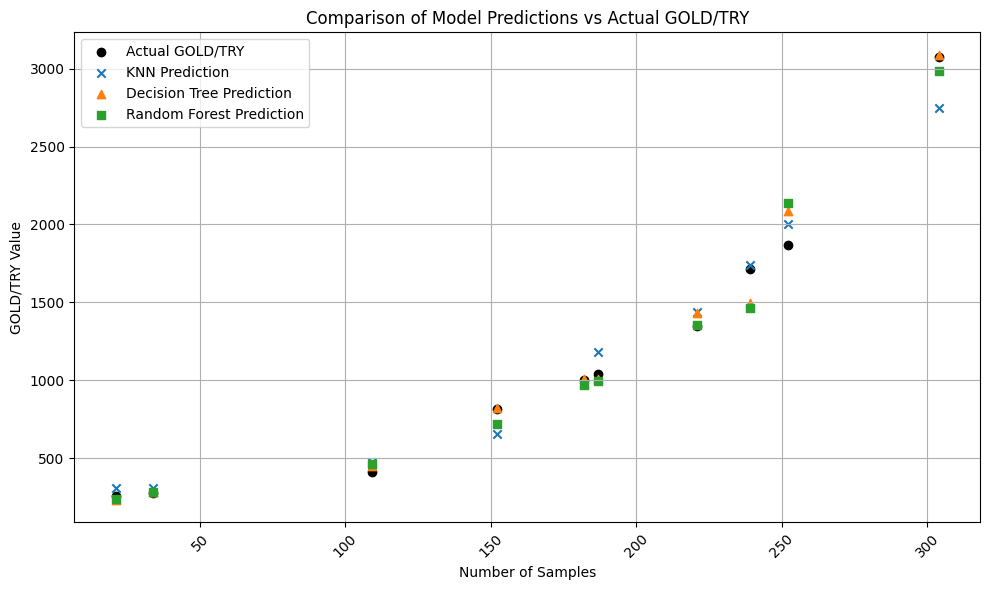

In [14]:
# ─── 1) Data Reading ─────────────────────────────────────────────
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  r2_score
df = pd.read_csv('../data/processed/merged_analysis.csv')


# convert datetime
for col in ['Week', 'Date']:
    df[col] = pd.to_datetime(df[col], errors='coerce')
    med = df[col].median()
    df[col] = df[col].fillna(med)
    df[f"{col}_ord"] = df[col].map(lambda d: d.toordinal())
    df.drop(col, axis=1, inplace=True)

# target
X = df[['Week_ord', 'Date_ord']]
y = df['FİYAT'].copy().dropna()
X = X.loc[y.index]

# ─── 2) Train / Test  ───────────────────────────────────────────────────
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.7, random_state=42
)

# ─── 3) Scalar ────────────────────────────────────────────────────────
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

# ─── 4) Models ──────────────────────────────────────────
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree      import DecisionTreeRegressor
from sklearn.ensemble  import RandomForestRegressor

models = {
    'KNN (k=5)'       : KNeighborsRegressor(n_neighbors=5),
    'Decision Tree'   : DecisionTreeRegressor(random_state=42),
    'Random Forest'   : RandomForestRegressor(n_estimators=100, random_state=42),
}

preds = {}
for name, mdl in models.items():
    mdl.fit(X_train_s, y_train)
    preds[name] = mdl.predict(X_test_s)

# ─── 5) Metrics ───────────────────────────────────────────────
from sklearn.metrics import r2_score

results = []
for name, y_pred in preds.items():
    r2   = r2_score(y_test, y_pred)
    results.append((name, r2))

metrics_df = pd.DataFrame(
    results,
    columns=['Model', 'R²']
).set_index('Model')

print(metrics_df)

# ─── 6) Comparison ────────────────────────────────
sample_idx = np.random.RandomState(42).choice(len(y_test), 10, replace=False)
comp = pd.DataFrame({
    'Real': y_test.values[sample_idx],
    '(KNN)': preds['KNN (k=5)'][sample_idx],
    '(DT)':   preds['Decision Tree'][sample_idx],
    '(RF)':   preds['Random Forest'][sample_idx],
}, index=y_test.index[sample_idx])

# Plotting scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(comp.index, comp['Real'], label='Actual GOLD/TRY', color='black', marker='o')
plt.scatter(comp.index, comp['(KNN)'], label='KNN Prediction', marker='x')
plt.scatter(comp.index, comp['(DT)'], label='Decision Tree Prediction', marker='^')
plt.scatter(comp.index, comp['(RF)'], label='Random Forest Prediction', marker='s')
plt.xticks(rotation=45)
plt.ylabel('GOLD/TRY Value')
plt.xlabel('Number of Samples')
plt.title('Comparison of Model Predictions vs Actual GOLD/TRY')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.savefig('../data/processed/Comparison_of_Model_gold.png')
plt.show()